In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
data = pd.read_csv("Titanic_data_Set.csv")

In [5]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Fare,Age,SibSp,Parch
0,1,0,3,1,7.2500,22.0,1,0
1,2,1,1,2,71.2833,38.0,1,0
2,3,1,3,2,7.9250,26.0,0,0
3,4,1,1,2,53.1000,35.0,1,0
4,5,0,3,1,8.0500,35.0,0,0


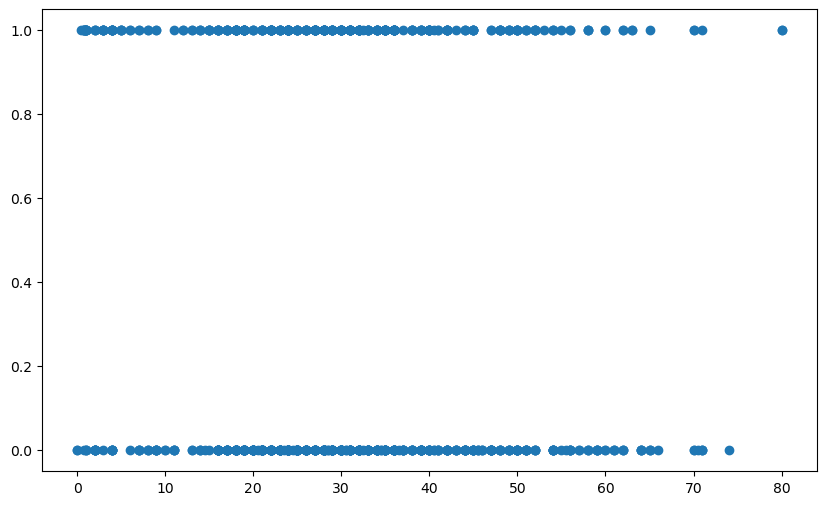

In [6]:
plt.scatter(data['Age'], data['Survived'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Survived'], test_size=0.20)

In [9]:
#  Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

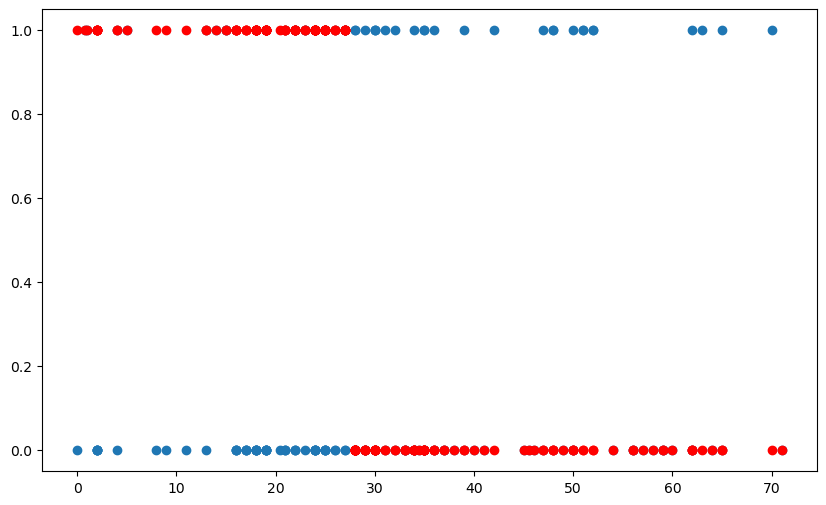

Accuracy = 0.553072625698324


In [10]:
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

C:\Users\taham\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


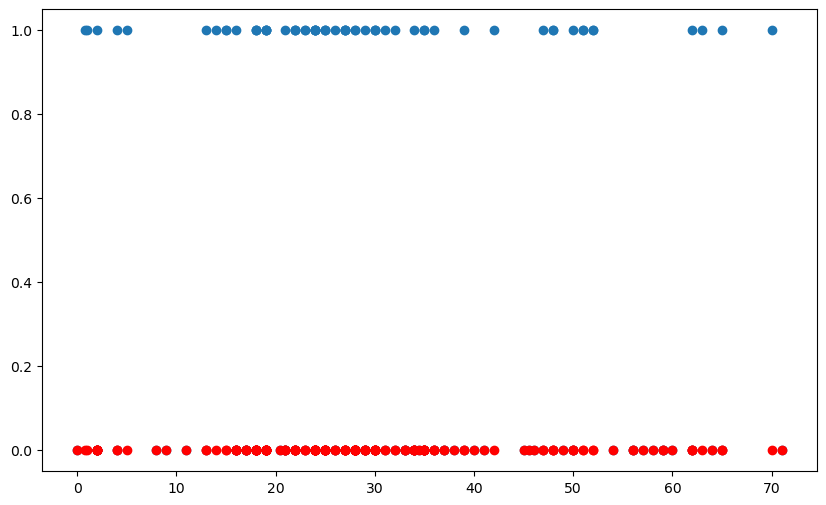

Accuracy = 0.6536312849162011


In [11]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")